# ANALYSIS AND PREDICTION ON CARDIOVASCULAR DISEASE DATA SET

Cardiovascular disease is a general term used to describe a range of disorders that affect the heart. India has witnessed an alarming rise in the occurrence of heart disease in the past 25 years. The focus of this project is to predict if the patient has a cardiovascular disease or not, and assist physicians in defining the risk level of an individual patient. The purpose of using this dataset is to provide a complex, real world data example where the relationships between the features are not easily discovered by casual inspection.

# Dataset

For this Project, we have taken Cardiovascular Disease dataset from Kaggle. 

The dataset consist of 12 feature and approx 70000 records.

age : Objective feature|in days

gender : Objective feature|1- women , 2-men

height : Objective feature|in cm

weight : Objective feature|in Kg

ap_hi : Systolic blood pressure | Examination Feature | int

ap_lo : Diastolic blood pressure | Examination Feature | int

cholesterol: Examination Feature | 1: normal, 2: above normal, 3: well above normal

gluc : Glucose| Examination Feature |1: normal, 2: above normal, 3: well above normal

smoke : Smoking|Subjective Feature |binary

alco : Alcohol intake | Subjective Feature | binary

active : Physical activity | Subjective Feature | binary

cardio : Presence or absence of cardiovascular disease | Target Variable |binary

In [3]:
#Import all the required libraries.
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Import the dataset
data = pd.read_csv("C:/Users/Asus/Desktop/Data Science/DS Project/cardiovascular-disease-dataset/cardio_train.csv")

# Data Summary

In [5]:
#Dropping column - ID as it is not siginificant
df = pd.DataFrame(data) 
df = data.drop(['id'],axis=1)

In [6]:
#Retreiving the column names
col_list = df.columns.tolist()

In [7]:
#Converting age from days to years
df['age'] = (df['age'] / 365).round().astype('int64')

In [8]:
#Shape of the dataset
df.shape

(70000, 12)

In [9]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [10]:
# Finding out Summary Statistics of dataset.
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Data pre-processing

In [11]:
#Detecting Missing Values

df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [12]:
#2. Checking for duplicate values - There are 3816 duplicate values in the dataset
print("There is {} duplicated values in data frame".format(df.duplicated().sum()))

There is 3816 duplicated values in data frame


In [13]:
# Sort the duplicate values by descending order
duplicated = df[df.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=col_list, ascending= False) 

duplicated.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
59745,65,2,174,70.0,120,80,1,1,0,0,1,1
67250,65,2,174,70.0,120,80,1,1,0,0,1,1
48386,65,1,168,64.0,120,80,1,1,0,0,0,1
69356,65,1,168,64.0,120,80,1,1,0,0,0,1
38511,65,1,163,63.0,120,80,1,1,0,0,0,1


In [14]:
# Dropping the duplicates since they wont affect the model
df.drop_duplicates(inplace=True)
print("There is {} duplicated values in data frame".format(df.duplicated().sum()))

There is 0 duplicated values in data frame


In [15]:
#3. Detecting outliers and removing them to increase accuracy score of the model

In [16]:
#Finiding and dropping the values where ap_lo is higher than ap_hi, since it is impossible in real life
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo'] > df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1233 cases


In [17]:
df_bp = df.drop(df[df['ap_lo']> df['ap_hi']].index)

In [18]:
# Dropping rows with 2.5% - 97.5% inclusion range / boundary since we have sufficent data(70000)

In [19]:
df_bp.drop(df_bp[(df_bp['ap_hi'] > df_bp['ap_hi'].quantile(0.975)) | (df_bp['ap_hi'] < df_bp['ap_hi'].quantile(0.025))].index,inplace=True)
df_bp.drop(df_bp[(df_bp['ap_lo'] > df_bp['ap_lo'].quantile(0.975)) | (df_bp['ap_lo'] < df_bp['ap_lo'].quantile(0.025))].index,inplace=True)

In [20]:
df_hw = df_bp

In [21]:
# Dopping the Height and Weight oultliers in the dataset
df_hw.drop(df_hw[(df_hw['height'] > df_hw['height'].quantile(0.975)) | (df_hw['height'] < df_hw['height'].quantile(0.025))].index,inplace=True)
df_hw.drop(df_hw[(df_hw['weight'] > df_hw['weight'].quantile(0.975)) | (df_hw['weight'] < df_hw['weight'].quantile(0.025))].index,inplace=True)

In [22]:
#Dropping age outliers
df_hwa = df_hw
df_hwa.drop(df_hwa[df_hwa['age'] < df_hwa['age'].quantile(0.025)].index,inplace=True)
df_hwa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56522 entries, 0 to 69999
Data columns (total 12 columns):
age            56522 non-null int64
gender         56522 non-null int64
height         56522 non-null int64
weight         56522 non-null float64
ap_hi          56522 non-null int64
ap_lo          56522 non-null int64
cholesterol    56522 non-null int64
gluc           56522 non-null int64
smoke          56522 non-null int64
alco           56522 non-null int64
active         56522 non-null int64
cardio         56522 non-null int64
dtypes: float64(1), int64(11)
memory usage: 5.6 MB


# Data Visualization

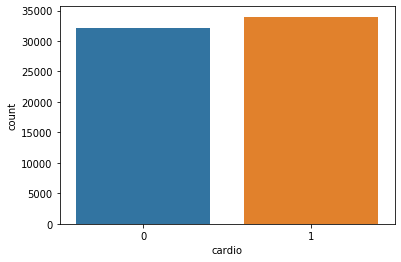

In [23]:
#To check by visulization if the dataset(label)is balanced or not
sns.countplot(x='cardio',data=df,linewidth=2)

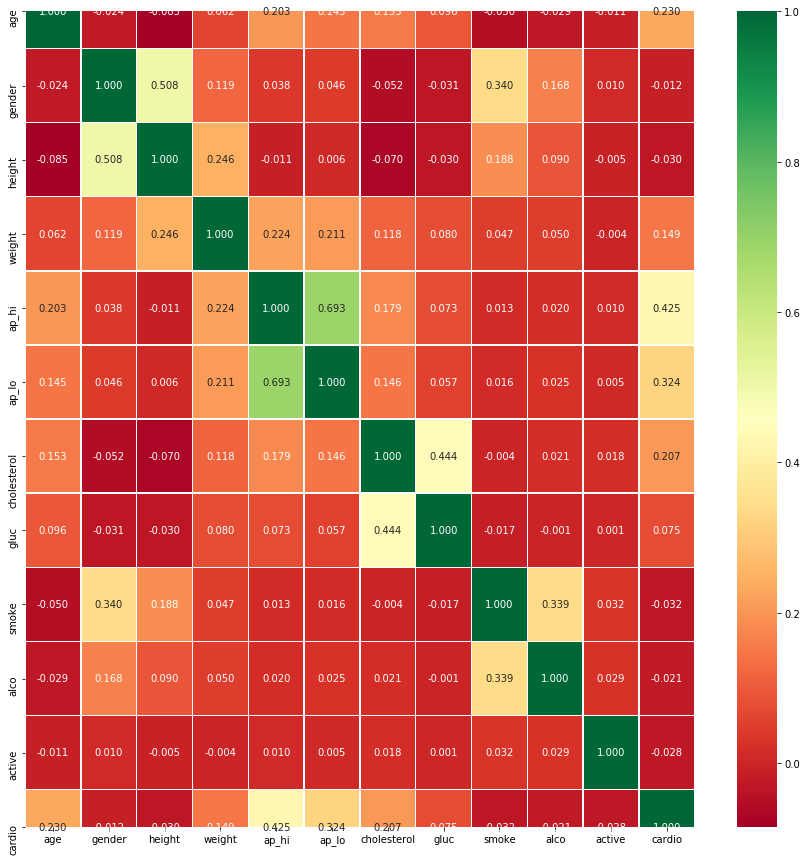

In [24]:
#Correlation Heatmap
corr = df_hwa.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax, cmap='RdYlGn')

By analyzing above graph, we can say that age,weight,cholesterol, ap_hi and ap_lo are more correlated to cardio variable compared to other factors.

Finding:
Below four factors have impact on target variable: cardio

1.age
2.ap_hi
3.ap_lo
4.weight

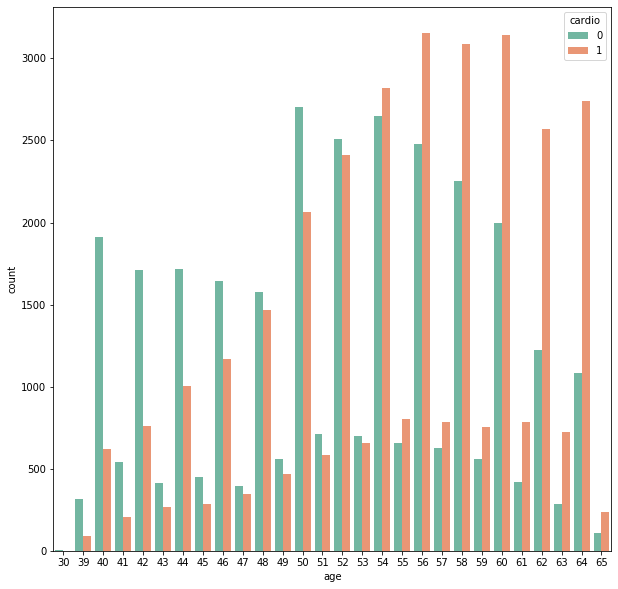

In [25]:
#Countplot for age in terms of year

from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 10
sns.countplot(x='age', hue='cardio', data = df, palette="Set2")

With increase in age, the risk of geeting cardiovascular disease increases. We can see that people from age group 55-65 are more prone to cardiovascular diseases.

Finding:
age has effect on cardio variable(target)

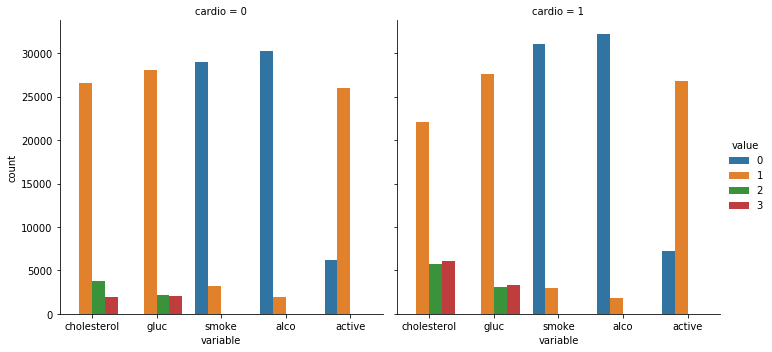

In [26]:
#Count Plot for Categorical variable cholesterol,gluc,smoke,alco,active

df_categorical = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",data=df_categorical, kind="count")


The above visulization showcase the counts of different categorical variable in terms of cardio variable.

Finding:

1.With more level of cholestrol and gluc, the possibility of cardiovascular disease increase.

2.Distribution of smoke and alco for cardio variable 0 and 1. This shows alco and smoke doesn't have much effect on cardio target variable.

3.Lesser the physical activiy, more prone to cardiovascular disease but the difference is not much significant. This shows we can ignore active variable while considering it's effect on cardio variable.

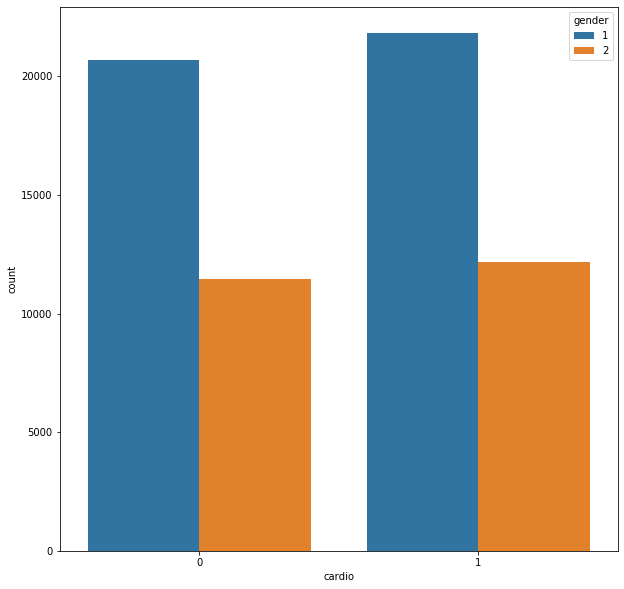

In [27]:
# visualize cardio with gender
sns.countplot(x='cardio',data=df,hue='gender')

The above visulization showcase the counts of different gender in terms of cardio variable.The distribution of values for cardio variable 0 and cardio variable 1 is similar and doesn't showcase any trend.This shows gender has not much effect on cardio vascular disease.

Finding:
gender has no significant effect on cardio target variable.

# FEATURE ENGINEERING

In [28]:
#diving data into features and label
features = df_hwa.iloc[:,:-1]
label = df_hwa.iloc[:,-1]

In [29]:
features.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50,2,168,62.0,110,80,1,1,0,0,1
1,55,1,156,85.0,140,90,3,1,0,0,1
2,52,1,165,64.0,130,70,3,1,0,0,0
3,48,2,169,82.0,150,100,1,1,0,0,1
4,48,1,156,56.0,100,60,1,1,0,0,0


In [30]:
label.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [31]:
#use get_dummies for feature 'gender' and rename it with appropriate names
dfeature = pd.get_dummies(features,columns = ['gender']).rename(columns={'gender_1':'gender_female','gender_2':'gender_male'})

In [32]:
dfeature.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,gender_female,gender_male
0,50,168,62.0,110,80,1,1,0,0,1,0,1
1,55,156,85.0,140,90,3,1,0,0,1,1,0
2,52,165,64.0,130,70,3,1,0,0,0,1,0
3,48,169,82.0,150,100,1,1,0,0,1,0,1
4,48,156,56.0,100,60,1,1,0,0,0,1,0


## MODEL: SUPPORT VECTOR MACHINES - CLASSIFICATION

In [33]:
#Validating various test accuracy scores with changing Random State

In [34]:
svc_scores = []
for i in range(1,11):
    model_SVC = SVC()
    x_train, x_test, y_train, y_test = train_test_split(dfeature,label, test_size = 0.2, random_state= i)
    sc = StandardScaler()
    x_train1 = sc.fit_transform(x_train)
    x_test1 = sc.transform(x_test)
    model_SVC.fit(x_train1,y_train)
    test_score = model_SVC.score(x_test1,y_test)
    train_score = model_SVC.score(x_train1,y_train)
    svc_scores.append(test_score)

KeyboardInterrupt: 

In [41]:
pd.options.display.max_rows = 9999

Text(0.5, 1.0, 'SVC Test scores for different random states')

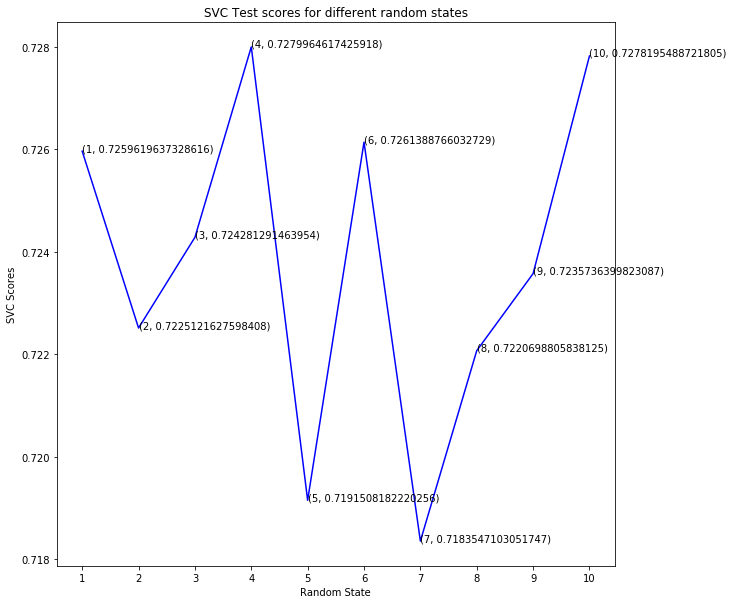

In [42]:
#Determining the random values that provides the highest test data prediction scores.
plt.plot([k for k in range(1, 11)], svc_scores, color = 'blue')

for i in range(1,11):
    plt.text(i, svc_scores[i-1], (i, svc_scores[i-1]))

plt.xticks([i for i in range(1, 11)])
plt.xlabel('Random State')
plt.ylabel('SVC Scores')
plt.title('SVC Test scores for different random states')


In [ ]:
svc_scores = {}
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in range(1,11):
    x_train, x_test, y_train, y_test = train_test_split(dfeature,label, test_size = 0.2, random_state= i)
    for g in gamma:
        model_SVC = SVC(gamma=g)
        sc = StandardScaler()
        x_train1 = sc.fit_transform(x_train)
        x_test1 = sc.transform(x_test)
        model_SVC.fit(x_train1,y_train)
        test_score = model_SVC.score(x_test1,y_test)
        train_score = model_SVC.score(x_train1,y_train)
        svc_scores[i] = [test_score,g]
        svc_scores[i].append(test_score)
        svc_scores[i].append(g)

In [ ]:
pd.DataFrame(svc_scores)

In [66]:
#from the above graph it is clear that the highest peak is for Random State = 4
#hence selecting random state = 4 for our SVC model

model_SVC = SVC(gamma=0.8)
x_train, x_test, y_train, y_test = train_test_split(dfeature,label, test_size = 0.2, random_state= 4)
sc = StandardScaler()
x_train1 = sc.fit_transform(x_train)
x_test1 = sc.transform(x_test)
model_SVC.fit(x_train1,y_train)
test_score = model_SVC.score(x_test1,y_test)
train_score = model_SVC.score(x_train1,y_train)


In [48]:
print("Test Score: {}".format(test_score))

Test Score: 0.7279964617425918


In [50]:
print("Test Score: {}".format(train_score))

Test Score: 0.7258332043258067


# Confusion Matrix and Classification Report

In [51]:
conf_matrix = confusion_matrix(label,model_SVC.predict(sc.transform(dfeature)) )
print("Confusion matrix:\n {} \n\n".format(conf_matrix))

classi_report = classification_report(label,model_SVC.predict(sc.transform(dfeature)) )
print("Classification Report: \n {}".format(classi_report))

Confusion matrix:
 [[21626  6139]
 [ 9333 19424]] 


Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.78      0.74     27765
           1       0.76      0.68      0.72     28757

    accuracy                           0.73     56522
   macro avg       0.73      0.73      0.73     56522
weighted avg       0.73      0.73      0.73     56522



## MODEL: LOGISTIC REGRESSION

In [52]:
# proper model [Logistic Regression] without looping (random_state= 4), using standard scaler

model_LR = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(dfeature,label, test_size = 0.2, random_state= 4)


sc = StandardScaler()
x_train1 = sc.fit_transform(x_train)
x_test1 = sc.transform(x_test)

model_LR.fit(x_train1,y_train)
test_score = model_LR.score(x_test1,y_test)
train_score = model_LR.score(x_train1,y_train)

print("Testing Score: {}, Training Score: {}, for Random state: {}".format(test_score,train_score,4))

Testing Score: 0.7254312251216276, Training Score: 0.7155936926377248, for Random state: 4


# Confuion Matrix and Classification Report

In [53]:
conf_matrix = confusion_matrix(label,model_LR.predict(sc.transform(dfeature)) )
print("Confusion matrix:\n {}\n\n".format(conf_matrix))

classi_report = classification_report(label,model_LR.predict(sc.transform(dfeature)) )
print("Classification Report: \n{}".format(classi_report))

Confusion matrix:
 [[21105  6660]
 [ 9304 19453]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.76      0.73     27765
           1       0.74      0.68      0.71     28757

    accuracy                           0.72     56522
   macro avg       0.72      0.72      0.72     56522
weighted avg       0.72      0.72      0.72     56522



In [54]:
# Regecting the below models as the train model score is greater than test model score. 

## MODEL: K- NEARST NEIGHBOURS

In [55]:
# proper model [K- NEARST NEIGHBOURS] without looping (random_state= 4), using standard scaler

model_KNN = KNeighborsClassifier()
x_train, x_test, y_train, y_test = train_test_split(dfeature,label, test_size = 0.2, random_state=4)

sc = StandardScaler()
x_train1 = sc.fit_transform(x_train)
x_test1 = sc.transform(x_test)

model_KNN.fit(x_train1,y_train)
test_score = model_KNN.score(x_test1,y_test)
train_score = model_KNN.score(x_train1,y_train)

print("Testing Score: {}, Training Score: {}, for Random state: {}".format(test_score,train_score,4))

Testing Score: 0.6800530738611233, Training Score: 0.7737797730941902, for Random state: 4


## MODEL: DECISION TREE

In [56]:
# proper model [DECISION TREE] without looping (random_state= 4), using standard scaler

model_DT = DecisionTreeClassifier()
x_train, x_test, y_train, y_test = train_test_split(dfeature,label, test_size = 0.2, random_state= 4)


sc = StandardScaler()
x_train1 = sc.fit_transform(x_train)
x_test1 = sc.transform(x_test)

model_DT.fit(x_train1,y_train)
test_score = model_DT.score(x_test1,y_test)
train_score = model_DT.score(x_train1,y_train)

print("Testing Score: {}, Training Score: {}, for Random state: {}".format(test_score,train_score,4))

Testing Score: 0.5983193277310924, Training Score: 0.9780392330318243, for Random state: 4


## MODEL: RANDOM FOREST

In [57]:
# proper model [RANDOM FOREST] without looping (random_state= 4), using standard scaler

model_RF = RandomForestClassifier()
x_train, x_test, y_train, y_test = train_test_split(dfeature,label, test_size = 0.2, random_state= 4)


sc = StandardScaler()
x_train1 = sc.fit_transform(x_train)
x_test1 = sc.transform(x_test)

model_RF.fit(x_train1,y_train)
test_score = model_RF.score(x_test1,y_test)
train_score = model_RF.score(x_train1,y_train)

print("Testing Score: {}, Training Score: {}, for Random state: {}".format(test_score,train_score,4))

Testing Score: 0.6630694383016364, Training Score: 0.9590861843996726, for Random state: 4


In [63]:
x_train, x_test, y_train, y_test = train_test_split(dfeature,label, test_size = 0.2, random_state= 4)


sc = StandardScaler()
x_train1 = sc.fit_transform(x_train)
x_test1 = sc.transform(x_test)

dec = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=100)
svm = SVC(random_state=4)
LR = LogisticRegression()


models = {"Decision tree" : dec,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Logistic Regression" : LR
          }
scores= { }

for key, value in models.items():    
    model = value
    model.fit(x_train1, y_train)
    scores[key] = model.score(x_test1,y_test)

In [64]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
SVM,0.727996
Logistic Regression,0.725431
KNN,0.722335
Random forest,0.678019
Decision tree,0.600354


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

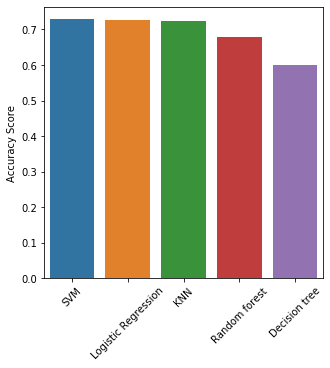

In [65]:
plt.figure(figsize=(5,5))
sns.barplot(x=scores_frame.index,y=scores_frame["Accuracy Score"])
plt.xticks(rotation=45)